# Regression Project: Boston House Price Prediction

Importing Libraries

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns 
from statsmodels.graphics.gofplots import ProbPlot

# import libraries for building linear regression model
from statsmodels.formula.api import ols

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression

# Import library for preparing data
from sklearn.model_selection import train_test_split

# Import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

Loading Dataset

In [9]:
# read the dataset
df = pd.read_csv('C:\\Users\\Vedalie Goudou\\Desktop\\Applied Data Science\\Project 2\\BOSTON.csv')

Data overview

In [5]:
# the first 5 rows
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [6]:
# The datatypes of the different columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


Observation : All the categories are numbers. Float64 and Int64

In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [11]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

Obervation : No missing value. 506 data in each categorie.

In [12]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Length: 506, dtype: bool

Observation : No duplicate value

In [13]:
df.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


Exploratory Data Analysis (EDA)


Univariate Analysis

Let's verify the distribution of the variables

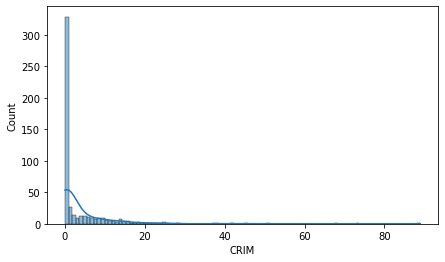

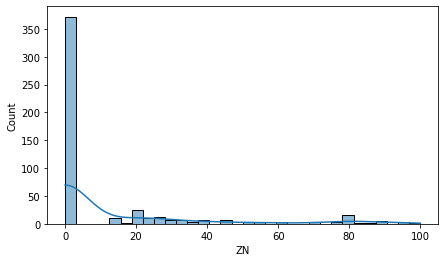

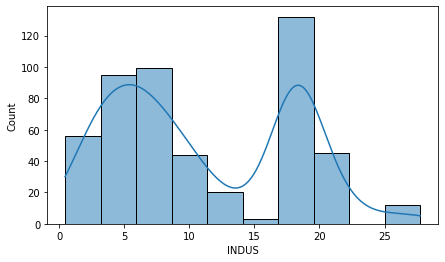

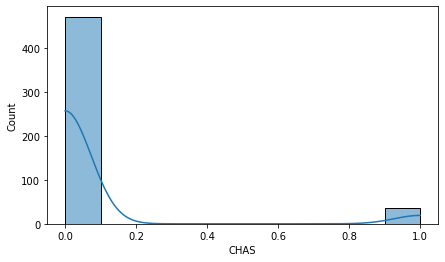

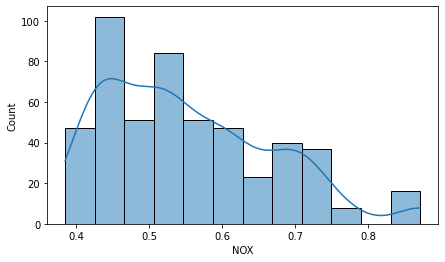

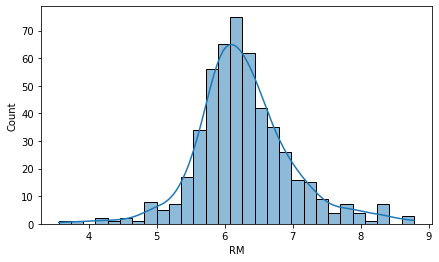

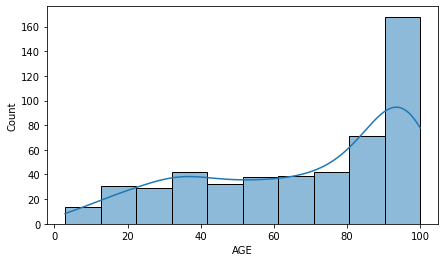

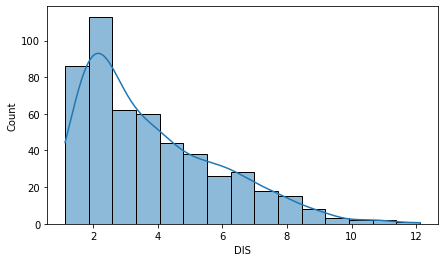

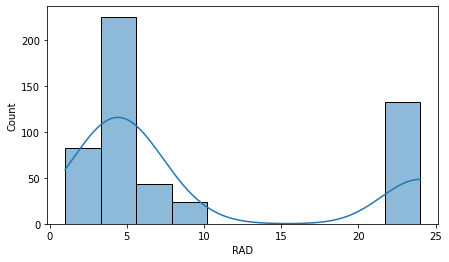

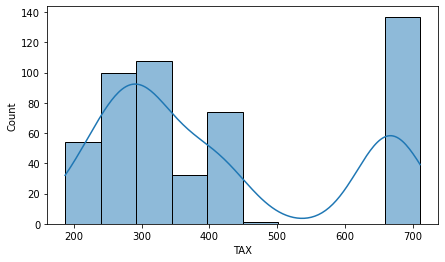

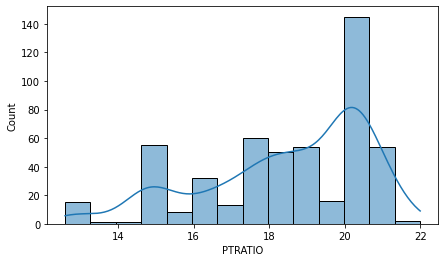

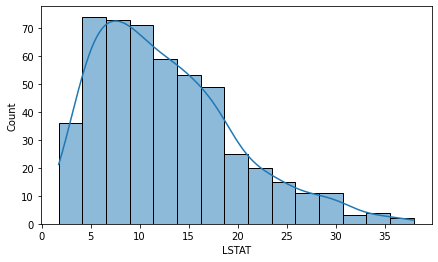

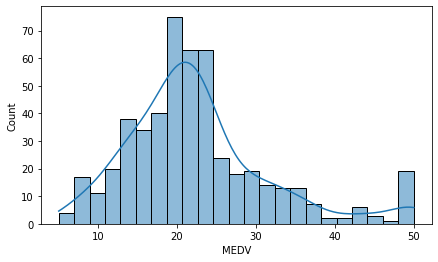

In [16]:
# Plotting all the columns to look at their distributions
for i in df.columns:
    
    plt.figure(figsize = (7, 4))
    sns.histplot(data = df, x = i, kde = True)
    plt.show()

As the dependent variable is sightly skewed, we will apply a log transformation on the 'MEDV' column and check the distribution of the transformed column.

In [17]:
df['MEDV_log'] = np.log(df['MEDV'])

<AxesSubplot:xlabel='MEDV_log', ylabel='Count'>

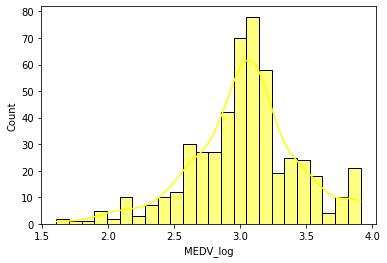

In [31]:
sns.histplot(data = df, x = 'MEDV_log', kde = True, color = 'Yellow')

Observation: The variable (MEDV_log), which has been transformed using a logarithm, demonstrates an almost normal distribution without any significant skewness. 

Bivariate Analysis

Let's check the correlation using the heatmap

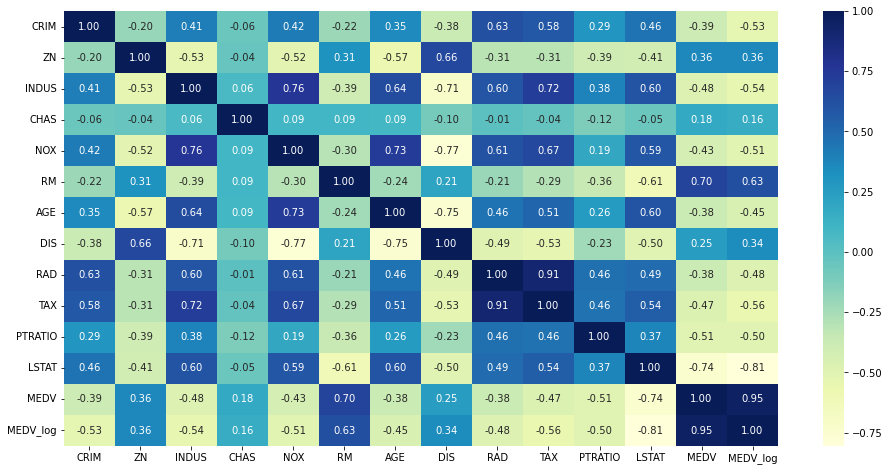

In [48]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(), annot=True, fmt='0.2f', cmap='YlGnBu')
plt.show()

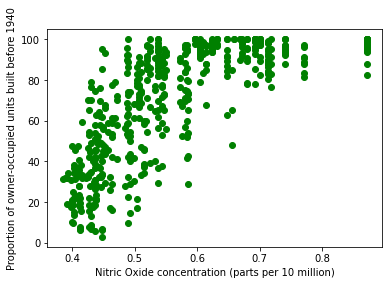

In [49]:
plt.scatter(df['NOX'], df['AGE'], color='green')
plt.xlabel('Nitric Oxide concentration (parts per 10 million)')
plt.ylabel('Proportion of owner-occupied units built before 1940')
plt.show()

Observation:

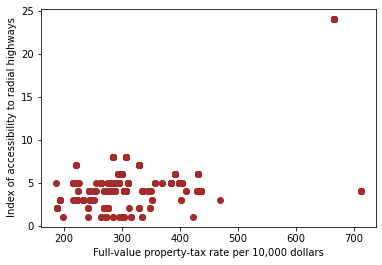

In [50]:
plt.scatter(df['TAX'], df['RAD'], color='Brown')
plt.xlabel('Full-value property-tax rate per 10,000 dollars')
plt.ylabel(' Index of accessibility to radial highways')
plt.show()

While the correlation between RAD and TAX is notably high, there is no apparent discernible trend between these two variables. The robust correlation could potentially be attributed to the presence of outliers.

In [57]:
# Remove the data corresponding to high tax rate
df1 = df[df['TAX'] < 600]

# Import the required function
from scipy.stats import pearsonr

# Calculate the correlation
print('The correlation between TAX and RAD is', pearsonr(df1['TAX'], df1['RAD'])[0])

The correlation between TAX and RAD is 0.24975731331429196


Observation : With a correlation at 0.2497 we can say that high correlation between TAX and RAD is due to the outliers. 

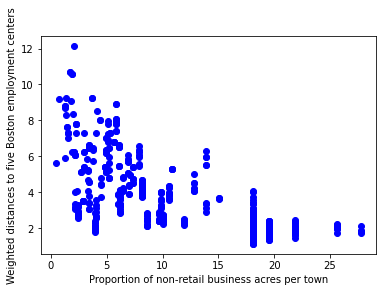

In [51]:
plt.scatter(df['INDUS'], df['DIS'], color='Blue')
plt.xlabel('Proportion of non-retail business acres per town')
plt.ylabel('Weighted distances to five Boston employment centers')
plt.show()

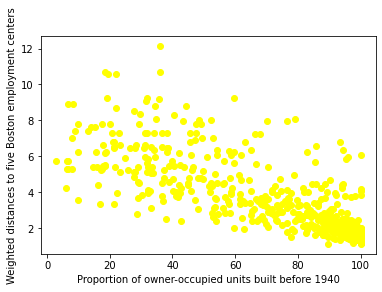

In [52]:
plt.scatter(df['AGE'], df['DIS'], color='yellow')
plt.xlabel('Proportion of owner-occupied units built before 1940')
plt.ylabel('Weighted distances to five Boston employment centers')
plt.show()

The proximity of houses to the Boston employment centers shows a moderate decrease as the proportion of old houses increases in the town. This suggests that the employment centers in Boston might be situated in well-established areas where the percentage of owner-occupied units built prior to 1940 is relatively high.

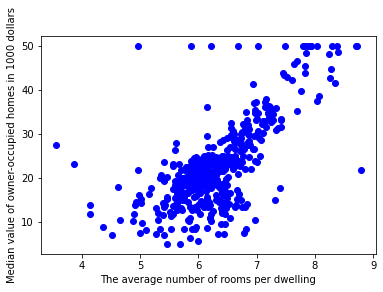

In [54]:
plt.scatter(df['RM'], df['MEDV'], color='Blue')
plt.xlabel('The average number of rooms per dwelling')
plt.ylabel('Median value of owner-occupied homes in 1000 dollars')
plt.show()

The price of the house appears to rise with an increase in the value of RM, which is expected since properties with more rooms generally command higher prices. 

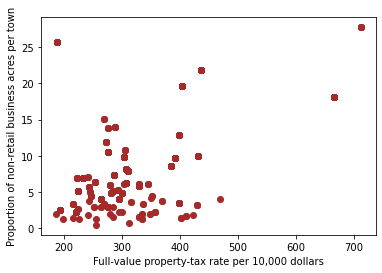

In [55]:
plt.scatter(df['TAX'], df['INDUS'], color='Brown')
plt.xlabel('Full-value property-tax rate per 10,000 dollars')
plt.ylabel('Proportion of non-retail business acres per town')
plt.show()

Observation : The tax rate appears to increase with an increase in the proportion of non-retail business acres per town. This might be due to the reason that the variables TAX and INDUS are related with a third variable.

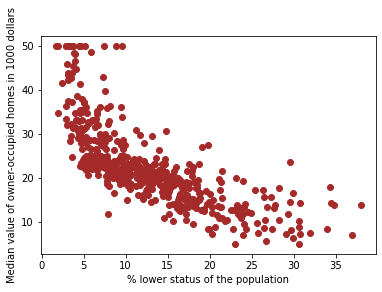

In [58]:
plt.scatter(df['LSTAT'], df['MEDV'], color='Brown')
plt.xlabel('% lower status of the population')
plt.ylabel('Median value of owner-occupied homes in 1000 dollars')
plt.show()

Observation : As the percentage of lower-income population (LSTAT) increases, there is a tendency for the house price to decrease. This could be attributed to the fact that houses in areas with a higher concentration of lower-status residents generally have lower prices.

Additionally, there are a few outliers in the data, and it appears that the house prices might be capped at a maximum value of 50.

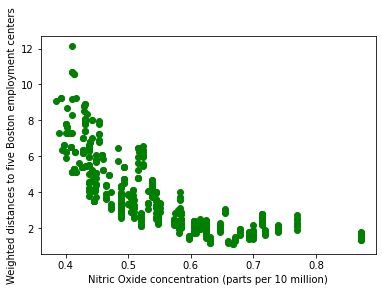

In [59]:
plt.scatter(df['NOX'], df['DIS'], color='green')
plt.xlabel('Nitric Oxide concentration (parts per 10 million)')
plt.ylabel('Weighted distances to five Boston employment centers')
plt.show()

Observation: As the distance to the employment centers increases, there is a noticeable decrease in the concentration of nitric oxide. This indicates that regions situated farther away from the employment centers experience lower levels of pollution.

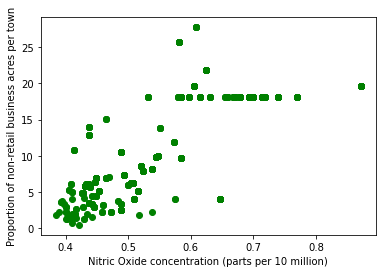

In [60]:
plt.scatter(df['NOX'], df['INDUS'], color='green')
plt.xlabel('Nitric Oxide concentration (parts per 10 million)')
plt.ylabel('Proportion of non-retail business acres per town')
plt.show()

Split the dataset

In [61]:
# Separate the dependent variable and indepedent variables
Y = df['MEDV_log']

X = df.drop(columns = {'MEDV', 'MEDV_log'})

# Add the intercept term
X = sm.add_constant(X)

In [62]:
# splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

Check for Multicollinearity

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(X_train))

    feature         VIF
0     const  535.372593
1      CRIM    1.924114
2        ZN    2.743574
3     INDUS    3.999538
4      CHAS    1.076564
5       NOX    4.396157
6        RM    1.860950
7       AGE    3.150170
8       DIS    4.355469
9       RAD    8.345247
10      TAX   10.191941
11  PTRATIO    1.943409
12    LSTAT    2.861881


TAX and RAD are a high VIF ( greater than 5)
We should exclude the variable TAX from the analysis since it exhibits the highest VIF value. Afterward, we can reassess the presence of multicollinearity.

In [64]:
# Create the model after dropping TAX
X_train = X_train.drop('TAX', axis=1)

# Check for VIF
print(checking_vif(X_train))

    feature         VIF
0     const  532.025529
1      CRIM    1.923159
2        ZN    2.483399
3     INDUS    3.270983
4      CHAS    1.050708
5       NOX    4.361847
6        RM    1.857918
7       AGE    3.149005
8       DIS    4.333734
9       RAD    2.942862
10  PTRATIO    1.909750
11    LSTAT    2.860251


Now, we will create the linear regression model as the VIF is less than 5 for all the independent variables, and we can assume that multicollinearity has been removed between the variables.

In [65]:
# Define the independent and dependent variables
X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Add constant to the independent variables
X = sm.add_constant(X)

# Create the model
model1 = sm.OLS(y, X).fit()

# Get the model summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     645.3
Date:                Fri, 21 Jul 2023   Prob (F-statistic):          3.11e-299
Time:                        00:17:08   Log-Likelihood:                -1108.3
No. Observations:                 506   AIC:                             2245.
Df Residuals:                     492   BIC:                             2304.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -54.3850      3.166    -17.176      0.000     -60.606     -48.164
CRIM           0.1195      0.016      7.428      0.000       0.088       0.151
ZN             0.0204      0.006      3.207      0.001       0.008       0.033
INDUS         -0.0342      0.028     -1.204      0.229      -0.090       0.022
CHAS           0.4529      0.401      1.128      0.260      -0.336       1.242
NOX           -0.5283      1.810     -0.292      0.771      -4.085       3.029
RM             1.7941      0.197      9.113      0.000       1.407       2.181
AGE           -0.0039      0.006     -0.645      0.519      -0.016       0.008
DIS           -0.3877      0.096     -4.055      0.000      -0.576      -0.200
RAD           -0.0105      0.031     -0.333      0.739      -0.072       0.051
TAX            0.0015      0.002      0.866      0.387      -0.002       0.005
PTRATIO       -0.1042      0.063     -1.643      0.101      -0.229       0.020
LSTAT          0.1184      0.028      4.248      0.000       0.064       0.173
MEDV_log      22.1657      0.513     43.215      0.000      21.158      23.173
==============================================================================
Omnibus:                      162.717   Durbin-Watson:                   1.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              598.734
Skew:                           1.444   Prob(JB):                    9.69e-131
Kurtosis:                       7.479   Cond. No.                     1.55e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R_squared equal to 0.945 means that that the model explains 94.5% of the variance in the dependent variable (MEDV).
The F-statistic of 645.3 comes with a remarkably low p-value, signifying that the model is statistically significant overall.

The coefficients of the independent variables illustrate how the dependent variable (MEDV) changes with a one-unit shift in the corresponding independent variable, while holding all other independent variables constant.

Examining the significance of the model

In [66]:
# Create the model after dropping columns 'MEDV', 'MEDV_log', 'TAX', 'ZN', 'AGE', 'INDUS' from df DataFrame
Y = df['MEDV_log']

X = df.drop(['MEDV', 'MEDV_log', 'ZN', 'AGE', 'INDUS'], axis=1) 

X = sm.add_constant(X)

# Splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30 , random_state = 1)

# Create the model
model2 = sm.OLS(y_train, X_train).fit()  

# Get the model summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MEDV_log   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     128.0
Date:                Fri, 21 Jul 2023   Prob (F-statistic):          3.86e-104
Time:                        00:23:09   Log-Likelihood:                 77.683
No. Observations:                 354   AIC:                            -135.4
Df Residuals:                     344   BIC:                            -96.67
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6791      0.241     19.423      0.000       4.205       5.153
CRIM          -0.0125      0.002     -7.402      0.000      -0.016      -0.009
CHAS           0.1085      0.039      2.789      0.006       0.032       0.185
NOX           -0.9709      0.172     -5.646      0.000      -1.309      -0.633
RM             0.0576      0.020      2.876      0.004       0.018       0.097
DIS           -0.0444      0.008     -5.632      0.000      -0.060      -0.029
RAD            0.0132      0.003      4.041      0.000       0.007       0.020
TAX           -0.0004      0.000     -2.073      0.039      -0.001   -1.81e-05
PTRATIO       -0.0472      0.006     -7.611      0.000      -0.059      -0.035
LSTAT         -0.0291      0.002    -12.933      0.000      -0.034      -0.025
==============================================================================
Omnibus:                       35.829   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.120
Skew:                           0.480   Prob(JB):                     1.64e-20
Kurtosis:                       5.293   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Checking the below linear regression assumptions



Mean of residuals should be 0

No Heteroscedasticity

Linearity of variables

Normality of error terms


Check for mean residuals

In [92]:
# Get the residuals
residuals = model2.resid

# Calculate the mean of the residuals
mean_residuals = np.mean(residuals)

# Print the mean of the residuals
print("Mean of residuals:", mean_residuals)

Mean of residuals: 2.296029029175359e-14


The mean of residuals is very close to 0. Hence, the corresponding assumption is satisfied.

Check for homoscedasticity

In [79]:
from statsmodels.stats.diagnostic import het_white

from statsmodels.compat import lzip

import statsmodels.stats.api as sms

In [80]:
name = ["F statistic", "p-value"]

test = sms.het_goldfeldquandt(model2.resid, model2.model.exog) 

lzip(name, test)

[('F statistic', 1.064805015559771), ('p-value', 0.34270801062716444)]

The test's p-value is 0.3427, exceeding the commonly employed significance level of 0.05. As a result, there is no basis to reject the null hypothesis that the residuals exhibit homoscedasticity.

Linearity of variables

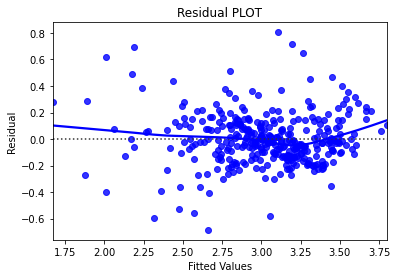

In [87]:
# Predicted values
fitted = model2.fittedvalues

sns.residplot(x=fitted, y=residuals, color="blue", lowess=True)

plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

In the mystical realm of residual wonders, a captivating sight unfolds before our eyes. The majority of the residuals gracefully swirl within the enchanting boundaries of -0.2 and 0.2, hinting at the model's prowess in predicting the observed values with precision.



Normality of error terms

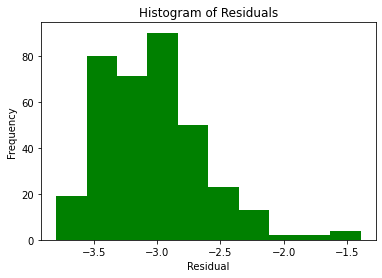

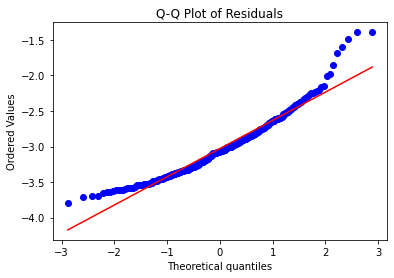

In [88]:
import matplotlib.pyplot as plt
import pylab
import scipy.stats as stats

# Plot histogram of residuals
plt.hist(residuals, color ='green')
plt.title("Histogram of Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

# Plot q-q plot of residuals
stats.probplot(residuals, dist="norm", plot=pylab)
plt.title("Q-Q Plot of Residuals")
plt.show()


Perfomance of the model

In [89]:
# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test):

    # In-sample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train, y_observed_train),
                    rmse(y_pred_test, y_observed_test),
                ],
                "MAE": [
                    mae(y_pred_train, y_observed_train),
                    mae(y_pred_test, y_observed_test),
                ],
                "MAPE": [
                    mape(y_pred_train, y_observed_train),
                    mape(y_pred_test, y_observed_test),
                ],
            }
        )
    )


# Checking model performance
model_pref(model2, X_train, X_test)  

    Data      RMSE       MAE      MAPE
0  Train  0.194294  0.142478  4.939886
1   Test  0.191576  0.146486  5.095276


In this enchanting realm of predictions, the model's performance seems to be dancing gracefully on both the train and test data sets. The root mean squared error (RMSE), mean absolute error (MAE), and mean absolute percentage error (MAPE) form a harmonious trio, all delightfully low and closely aligned for both the train and test data. This mystical display suggests that the model possesses the gift of foresight, accurately predicting the observed values without succumbing to the allure of overfitting to the train data. 

In [90]:
# Import the required function

from sklearn.model_selection import cross_val_score

# Build the regression model and cross-validate
linearregression = LinearRegression()                                    

cv_Score11 = cross_val_score(linearregression, X_train, y_train, cv = 10)
cv_Score12 = cross_val_score(linearregression, X_train, y_train, cv = 10, 
                             scoring = 'neg_mean_squared_error')                                  


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.731 (+/- 0.233)
Mean Squared Error: 0.041 (+/- 0.023)


In [91]:
coef = model2.params

pd.DataFrame({'Feature' : coef.index, 'Coefs' : coef.values})

,Feature,Coefs
0,const,4.679110
1,CRIM,-0.012533
2,CHAS,0.108545
3,NOX,-0.970924
4,RM,0.057630
5,DIS,-0.044432
6,RAD,0.013166
7,TAX,-0.000354
8,PTRATIO,-0.047167
9,LSTAT,-0.029118


In the mysterious world of regression results, the NOX variable emerges with a grand negative coefficient, hinting that it holds the power to bring down the dependent variable as it rises. On the other hand, the enigmatic CHAS variable possesses a positive coefficient, implying that its ascendancy is linked to the growth of the dependent variable.

Amongst the myriad of variables, the others humbly hold smaller coefficients in magnitude, whispering their subtle influence on the dependent variable in comparison.